<a href="https://colab.research.google.com/github/Imran012x/butterfly/blob/main/BF_%20Transfer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Lab -->> Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")

#Data Preprocessing

In [3]:
import zipfile
import os

# with zipfile.ZipFile('/content/drive/MyDrive/Butterfly/data_bf__8k.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

with zipfile.ZipFile('/content/drive/MyDrive/Butterfly/data_bf_raw_2038.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import random

In [6]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")



import os
import random
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define class names and their directories
classes = ['common', 'painted', 'red_based', 'red_spot']
data_dir = '/content/'  # Base directory containing class folders

# Define the number of images to select per class
image_limits = {
    'common': 600,
    'painted': 500,
    'red_based': 600,
    'red_spot': 400
}

# Function to process images with a limit
def load_images(class_name, max_images):
    image_path = os.path.join(data_dir, class_name)
    images = sorted(os.listdir(image_path))
    random.shuffle(images)  # Shuffle for randomness
    selected_images = images[:max_images]  # Select only the required number

    return [np.array(Image.open(os.path.join(image_path, img)).resize((224, 224)).convert('RGB')) for img in selected_images]

# Load images and labels
data, labels = [], []
for idx, class_name in enumerate(classes):
    class_images = load_images(class_name, image_limits[class_name])  # Apply limit
    data.extend(class_images)
    labels.extend([idx] * len(class_images))

# Convert to numpy arrays
X = np.array(data)
Y = np.array(labels)

# # Split dataset
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


# X_train_scaled = X_train/255
# X_test_scaled = X_test/255

# # Print dataset information
# print(f"Class counts: {dict(zip(*np.unique(Y, return_counts=True)))}")
# print(f"Shapes - X: {X.shape}, X_train: {X_train.shape}, X_test: {X_test.shape}")

GPU Available: True
GPU Name: Tesla T4


#Optuna-Hyper parameter Training

In [ ]:
# !pip install optuna
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#Unsupervised Learning

In [ ]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import zipfile
# import os
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet50 import preprocess_input

# # Set Random Seed for Reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# # 📌 Extract the ZIP File
# zip_file = "/content/drive/MyDrive/mixed.zip"  # Update this path
# extract_folder = "butterfly_dataset"

# if not os.path.exists(extract_folder):
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(extract_folder)

# # 📌 Generate Labels from Filenames
# image_folder = "butterfly_dataset/mixed"  # Path where images are stored

# # Get all image filenames
# image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))]



# # Load images and preprocess them for feature extraction
# img_size = (224, 224)
# images = []
# for img_file in image_files:
#     img_path = os.path.join(image_folder, img_file)
#     img = load_img(img_path, target_size=img_size)
#     img_array = img_to_array(img)  # Convert image to array
#     img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
#     images.append(img_array)

# # Convert list of images into a numpy array
# images = np.array(images)

# # Ensure the shape is correct (num_images, height, width, channels)
# print(f"Image shape: {images.shape}")

# # 📌 Use Pre-trained ResNet50 for Feature Extraction
# resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# resnet_model.trainable = False  # Freeze the layers

# # Extract features from the images
# features = resnet_model.predict(np.array(images), batch_size=32)

# # Flatten the features for clustering
# features_flat = features.reshape(features.shape[0], -1)



# # 📌 Apply KMeans Clustering to Group Images into Clusters (Pseudo-Labels)
# num_clusters = 4  # Set the number of clusters (adjust as needed)
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# pseudo_labels = kmeans.fit_predict(features_flat)

# # 📌 Create a DataFrame with the pseudo-labels
# df = pd.DataFrame({'filename': image_files, 'label': pseudo_labels})

# # Split into train and validation sets (80% train, 20% validation)
# from sklearn.model_selection import train_test_split
# train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# # 📌 Image Data Augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # 📌 Load Data from DataFrame (Single Folder)
# batch_size = 32

# train_df["label"] = train_df["label"].astype(str)
# val_df["label"] = val_df["label"].astype(str)

# train_generator = datagen.flow_from_dataframe(
#     train_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# val_generator = datagen.flow_from_dataframe(
#     val_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # 📌 CNN Model Definition
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.3),
#     Dense(num_clusters, activation='softmax')  # Number of clusters as output classes
# ])

# # 📌 Compile the Model
# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # 📌 Train the Model
# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=100, batch_size=batch_size, verbose=1)

# # 📌 Evaluate the Model
# val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# # 📌 Plot Training vs Validation Accuracy/Loss
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training & Validation Accuracy")

# plt.subplot(1,2,2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training & Validation Loss")
# plt.show()

# # 📌 Generate Predictions for Test Data
# y_true = val_generator.classes
# y_pred = np.argmax(model.predict(val_generator), axis=1)

# # 📌 Confusion Matrix & Performance Metrics
# conf_matrix = confusion_matrix(y_true, y_pred)
# acc = accuracy_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# # 📌 Plot Confusion Matrix Heatmap
# plt.figure(figsize=(6,5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# # 📌 Classification Report
# print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# # 📌 Save Model
# model.save("butterfly_classifier.h5")










# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import cv2
# import os
# from tensorflow.keras.preprocessing import image
# from google.colab import files  # Use this for Google Colab

# # 📌 Load the trained model
# model = tf.keras.models.load_model("butterfly_classifier.h5")

# # 📌 Define class names (must match the folder names used during training)
# class_names = ['common', 'painted', 'red_based', 'red_spot']  # Modify if needed

# # 📌 Function to Upload & Predict
# def upload_and_predict():
#     uploaded = files.upload()  # Opens a file uploader dialog

#     for filename in uploaded.keys():
#         # Load and preprocess the image
#         img_path = filename
#         img = image.load_img(img_path, target_size=(224, 224))  # Resize image
#         img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
#         img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

#         # 📌 Make Prediction
#         prediction = model.predict(img_array)
#         predicted_class = np.argmax(prediction)  # Get the class index
#         class_label = class_names[predicted_class]

#         # 📌 Display Image with Prediction
#         plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
#         plt.title(f"Predicted: {class_label}")
#         plt.axis("off")
#         plt.show()

#         print(f"🔹 Model Prediction: {class_label} (Confidence: {max(prediction[0]) * 100:.2f}%)")

# # 📌 Run the function
# upload_and_predict()

#Ensemble Learning

#CNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.2677 - loss: 23.7782 - val_accuracy: 0.2381 - val_loss: 6.7100
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.3314 - loss: 8.1498 - val_accuracy: 0.3452 - val_loss: 2.4804
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.3726 - loss: 4.2212 - val_accuracy: 0.3619 - val_loss: 1.9424
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.3164 - loss: 2.2395 - val_accuracy: 0.3619 - val_loss: 1.8198
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3250 - loss: 1.5988 - val_accuracy: 0.4000 - val_loss: 1.2915
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


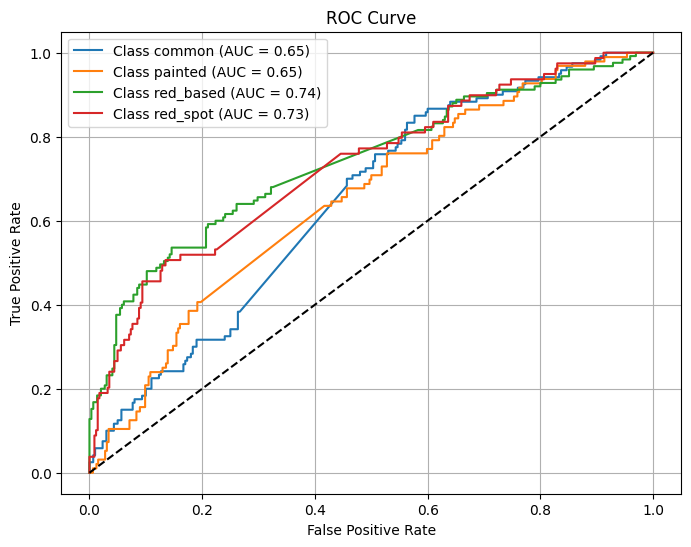

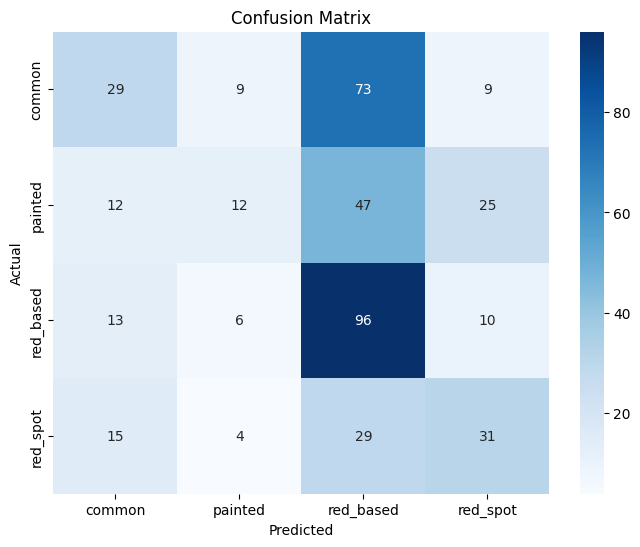

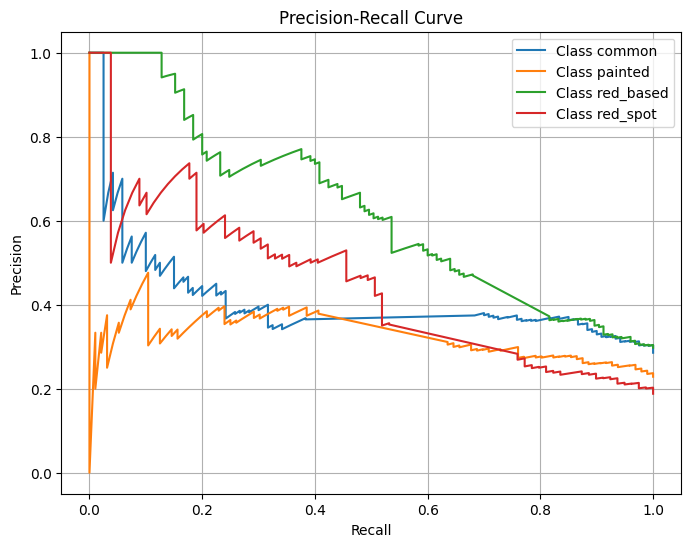

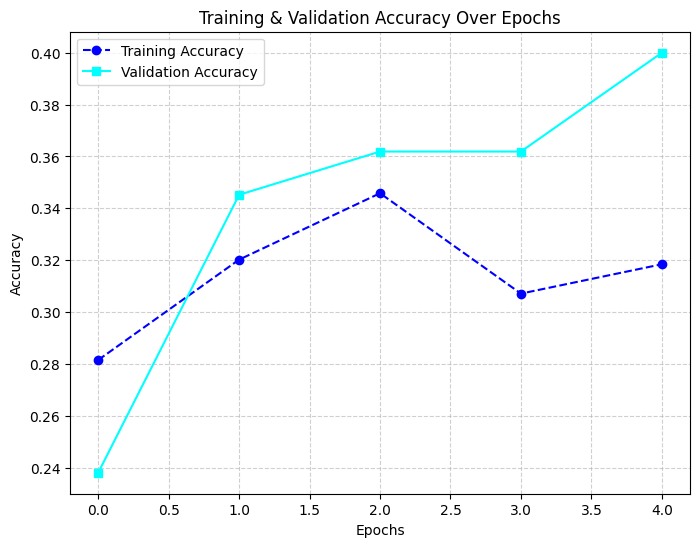

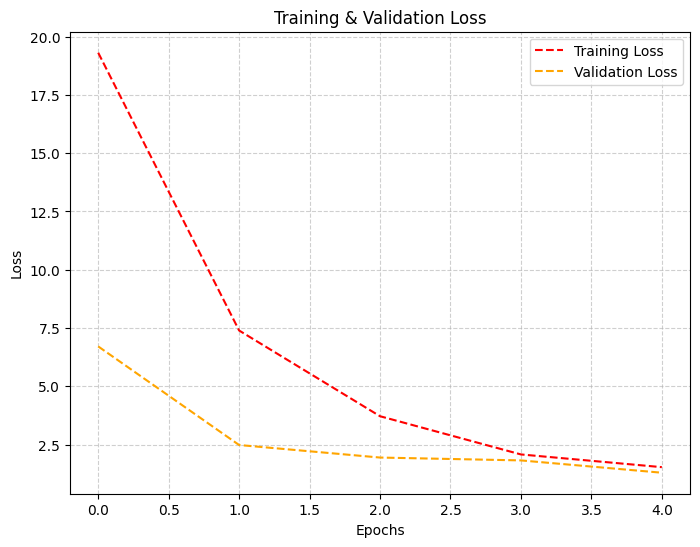

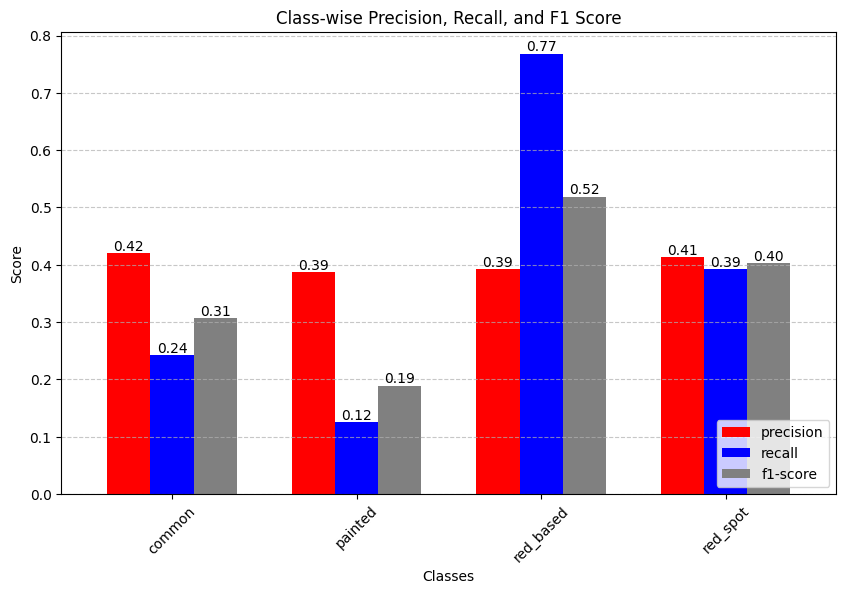


Final Model Performance:
Test Accuracy: 0.4000
F1 Score: 0.3610
Model saved successfully!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define class labels
class_labels = ['common', 'painted', 'red_based', 'red_spot']


# Define Base CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 Classes
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

# Predictions for Evaluation
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# ============================ VISUALIZATIONS ============================

# ROC Curve
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(4):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {class_labels[i]}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])
    df_report = df_report[['precision', 'recall', 'f1-score']]

    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# ============================ Generate Plots ============================

plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print Final Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# Save Model
model.save('butterfly_cnn_model.keras')
print("Model saved successfully!")

#ResNet50


Fold-by-Fold Visualizations:

Evaluating Fold 1:
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


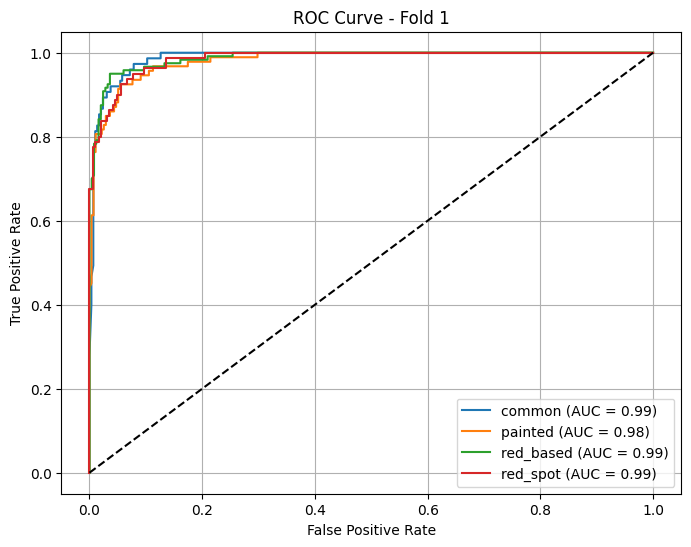

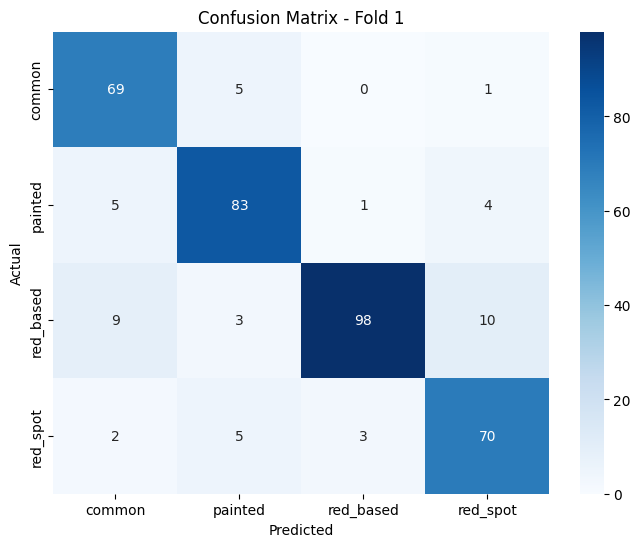

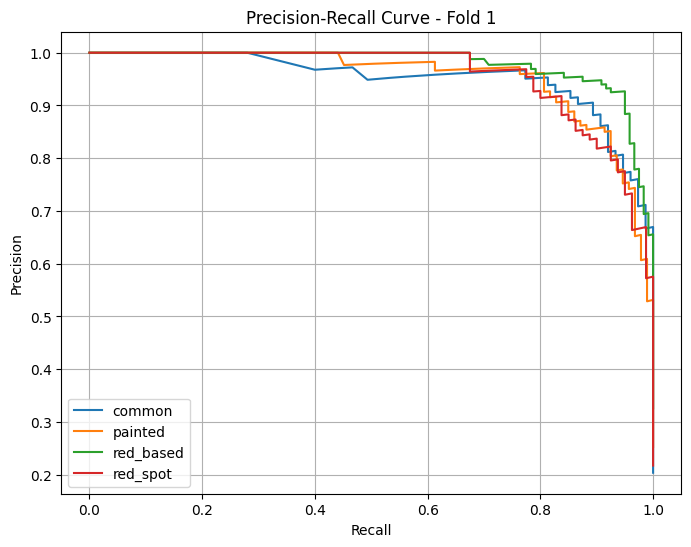

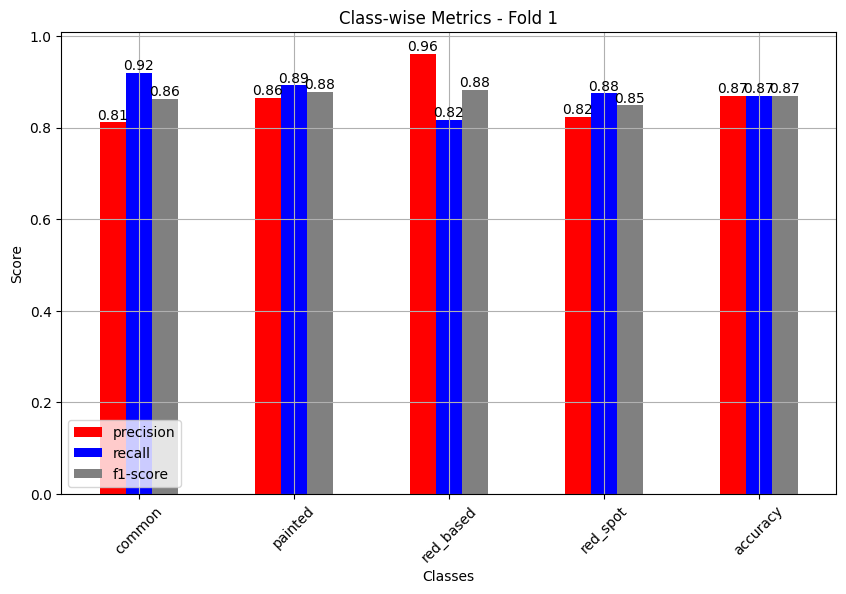

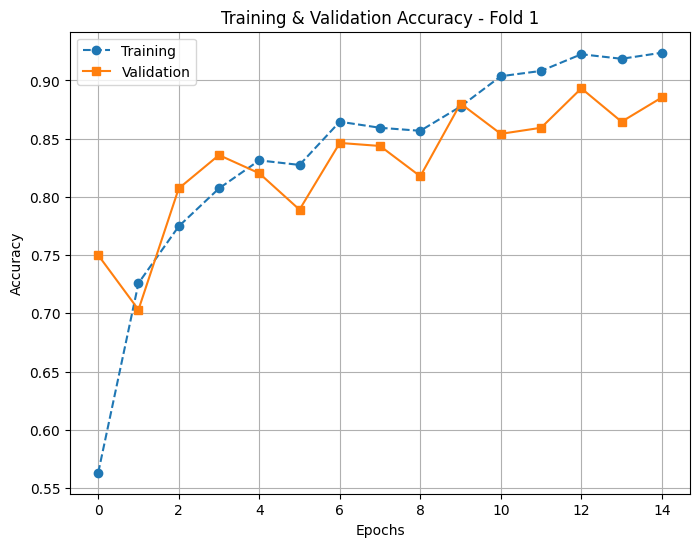

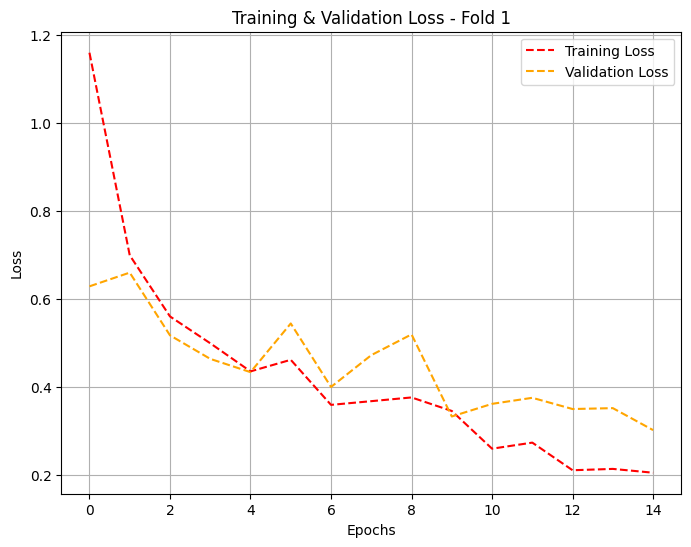

Classification Report - Fold 1:
              precision    recall  f1-score   support

      common       0.81      0.92      0.86        75
     painted       0.86      0.89      0.88        93
   red_based       0.96      0.82      0.88       120
    red_spot       0.82      0.88      0.85        80

    accuracy                           0.87       368
   macro avg       0.87      0.88      0.87       368
weighted avg       0.88      0.87      0.87       368


Evaluating Fold 2:
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step


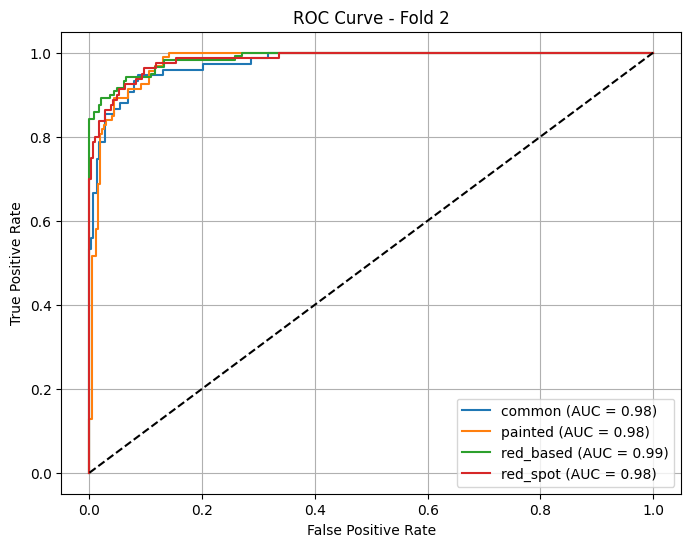

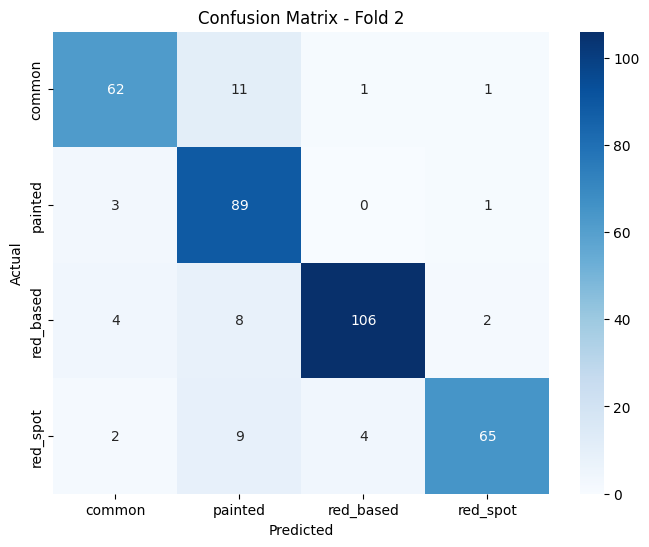

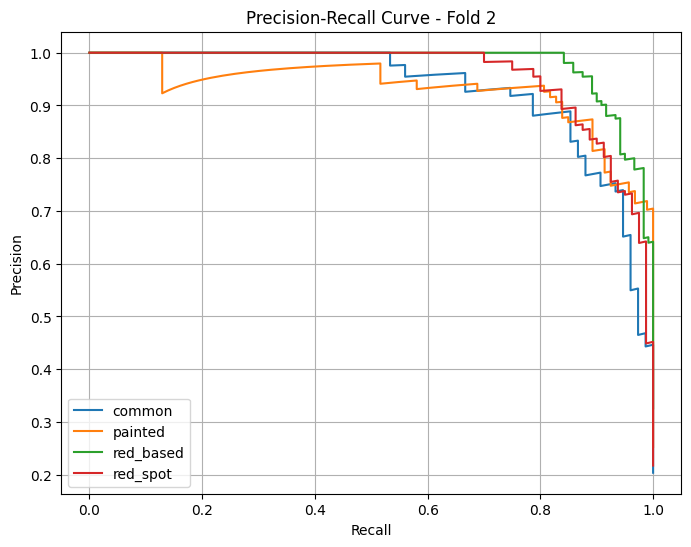

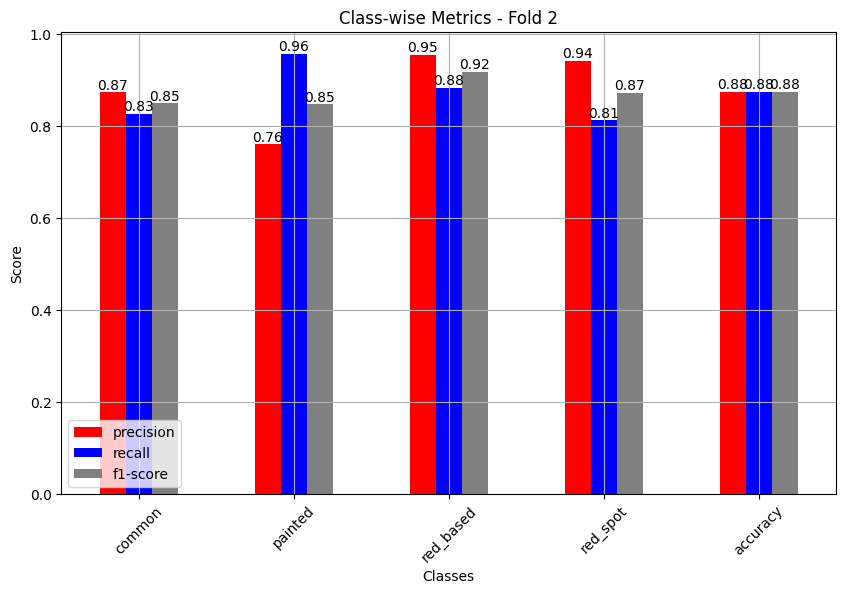

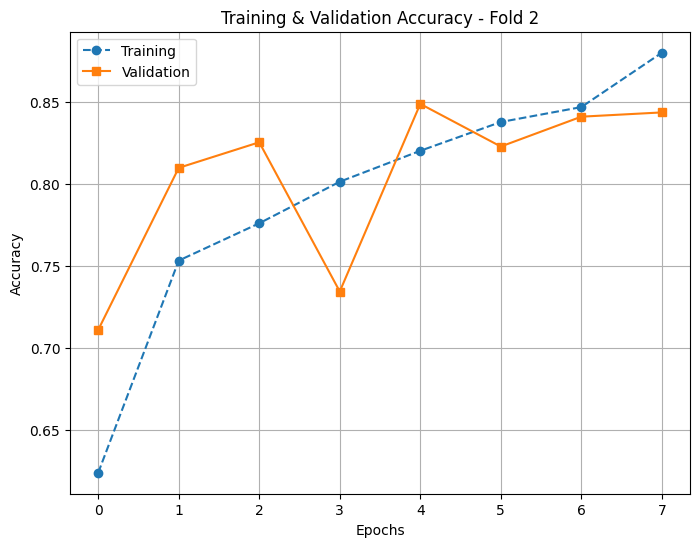

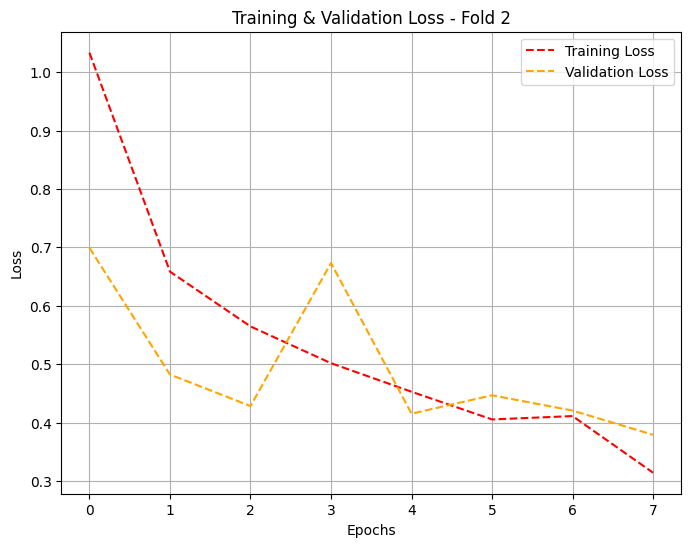

Classification Report - Fold 2:
              precision    recall  f1-score   support

      common       0.87      0.83      0.85        75
     painted       0.76      0.96      0.85        93
   red_based       0.95      0.88      0.92       120
    red_spot       0.94      0.81      0.87        80

    accuracy                           0.88       368
   macro avg       0.88      0.87      0.87       368
weighted avg       0.89      0.88      0.88       368


Evaluating Fold 3:
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


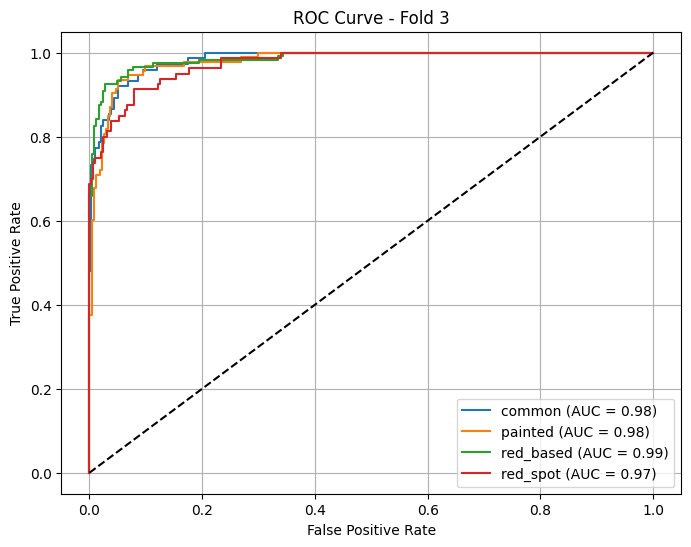

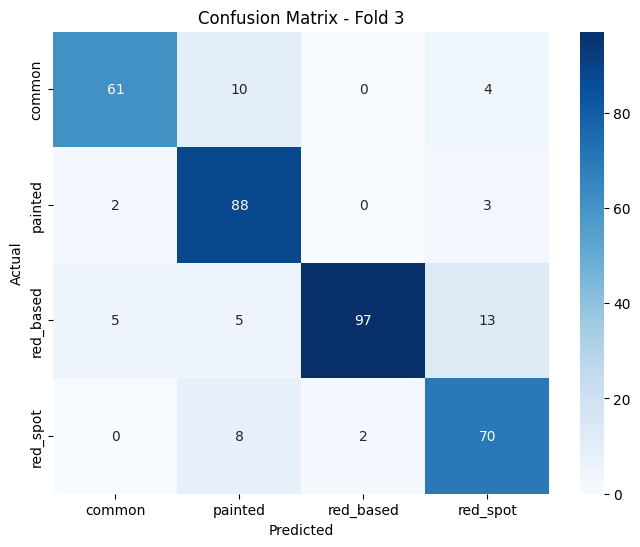

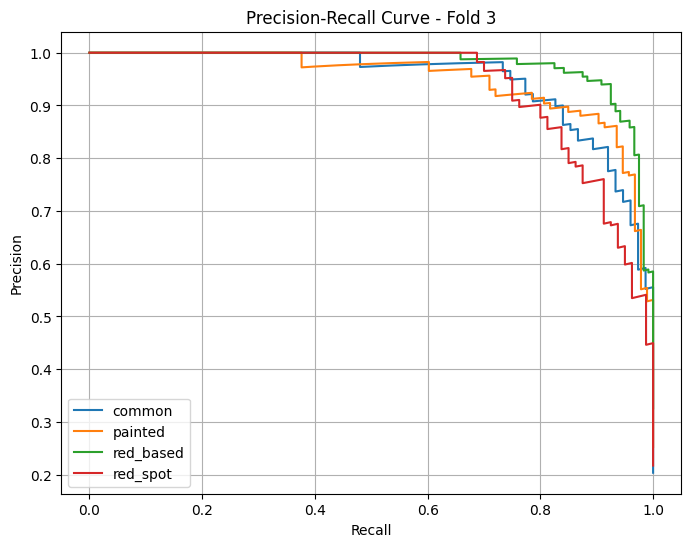

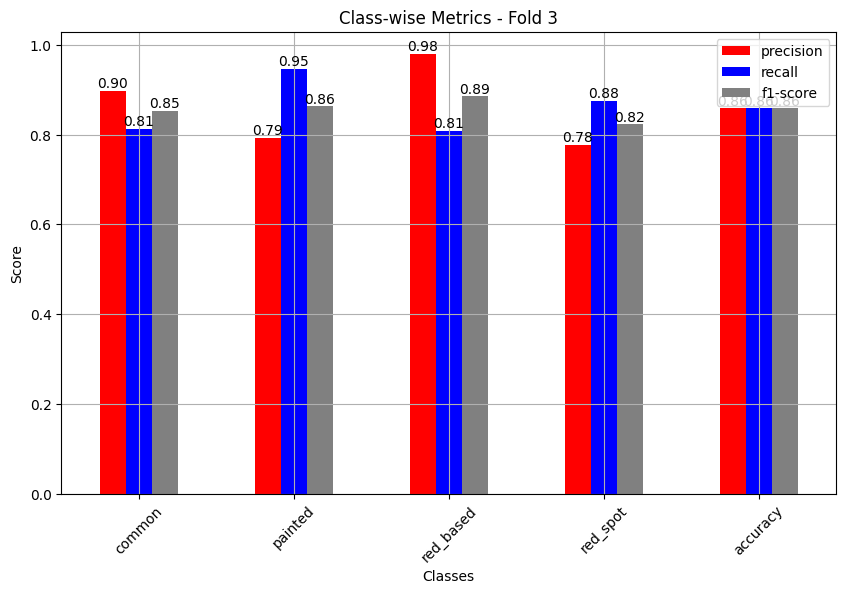

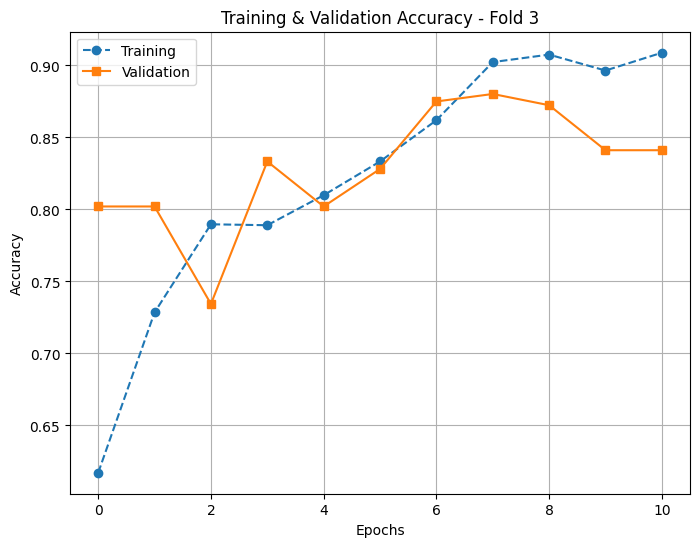

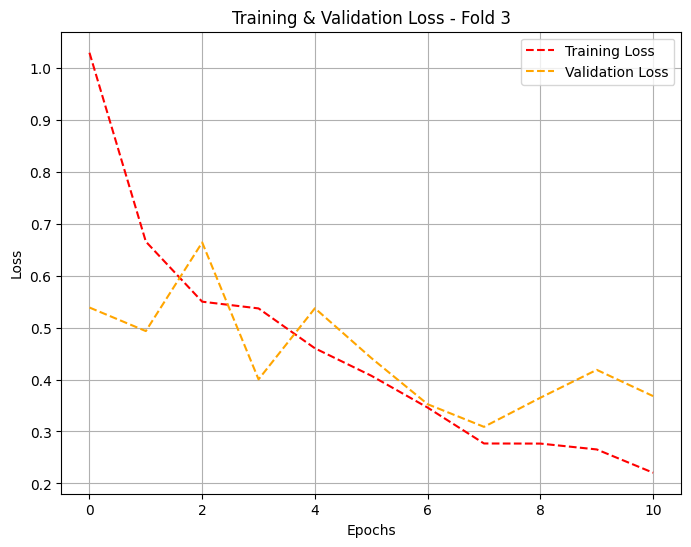

Classification Report - Fold 3:
              precision    recall  f1-score   support

      common       0.90      0.81      0.85        75
     painted       0.79      0.95      0.86        93
   red_based       0.98      0.81      0.89       120
    red_spot       0.78      0.88      0.82        80

    accuracy                           0.86       368
   macro avg       0.86      0.86      0.86       368
weighted avg       0.87      0.86      0.86       368


Evaluating Fold 4:
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


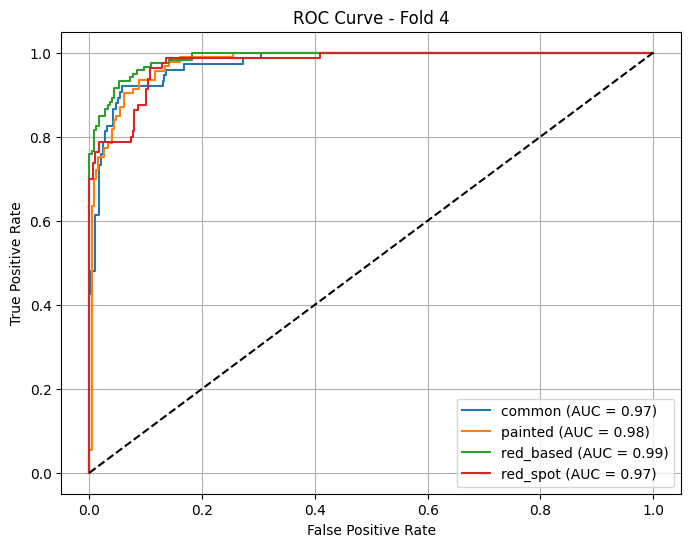

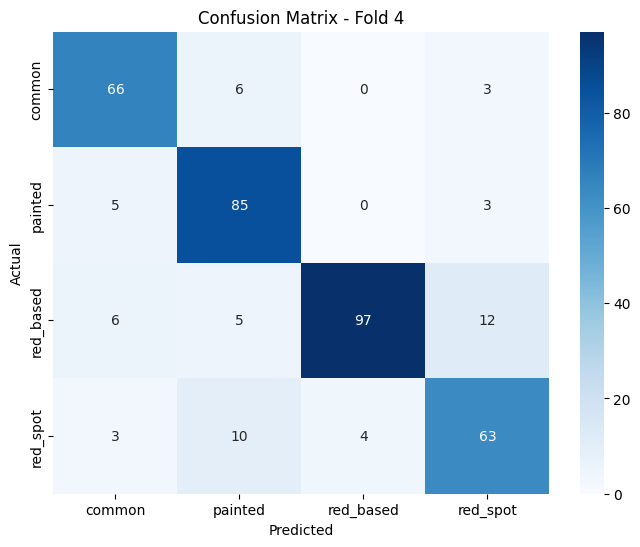

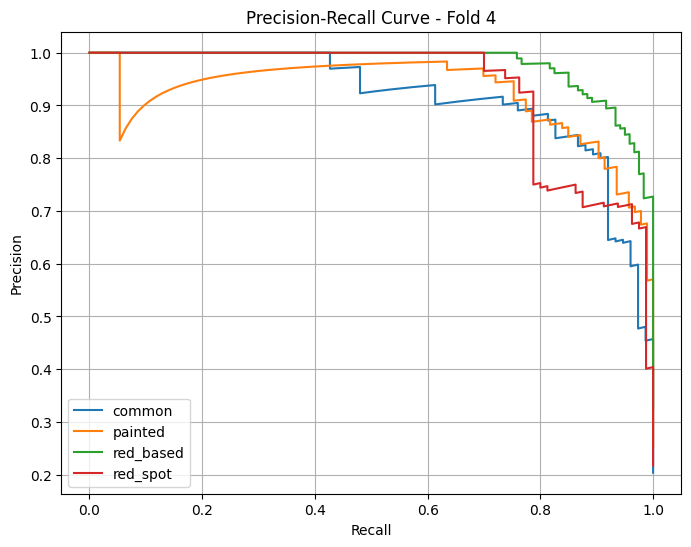

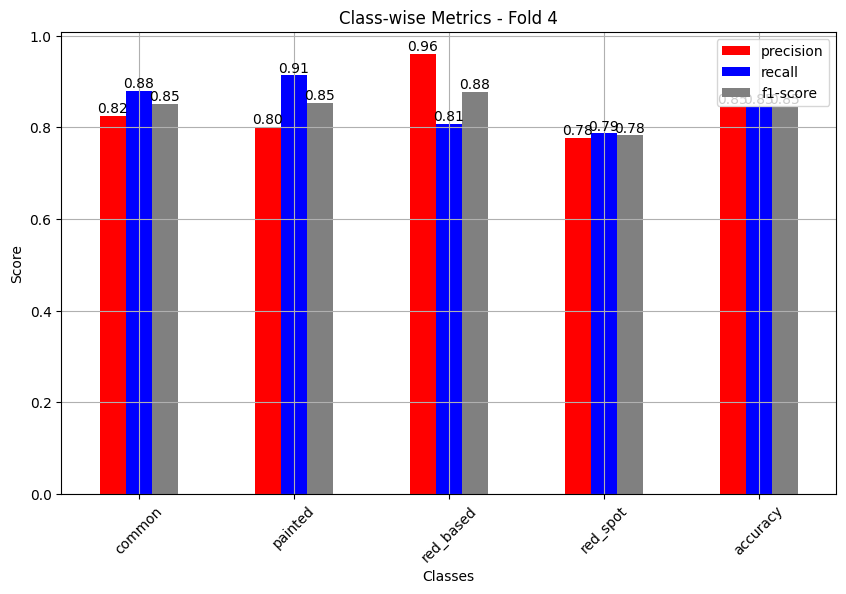

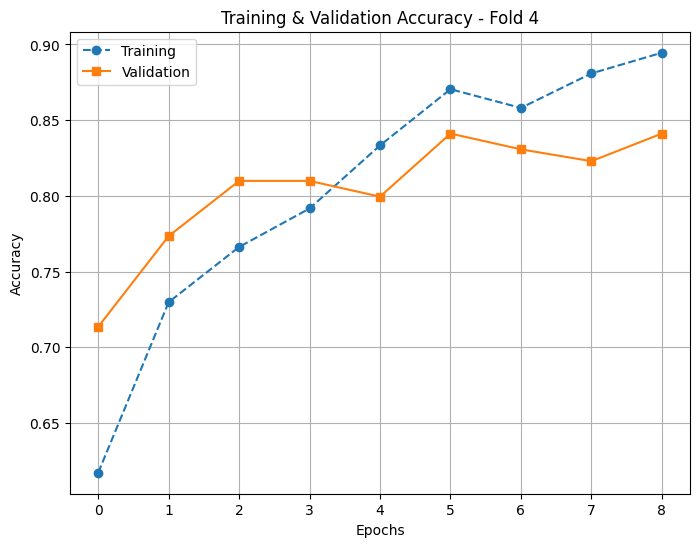

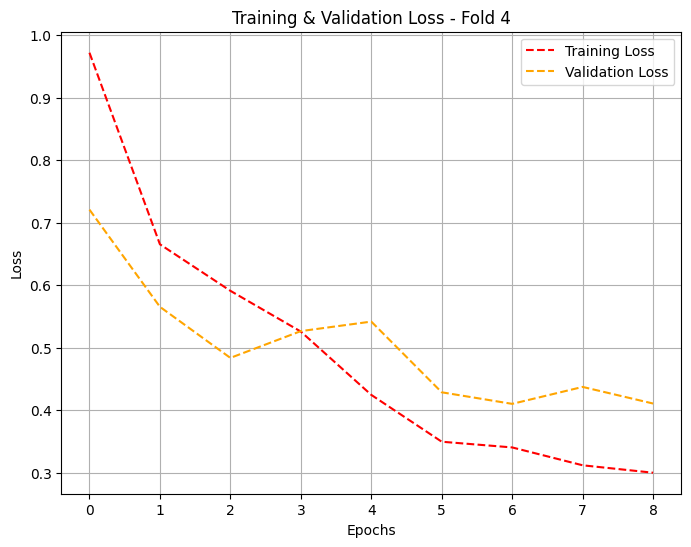

Classification Report - Fold 4:
              precision    recall  f1-score   support

      common       0.82      0.88      0.85        75
     painted       0.80      0.91      0.85        93
   red_based       0.96      0.81      0.88       120
    red_spot       0.78      0.79      0.78        80

    accuracy                           0.85       368
   macro avg       0.84      0.85      0.84       368
weighted avg       0.85      0.85      0.85       368


Evaluating Fold 5:
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


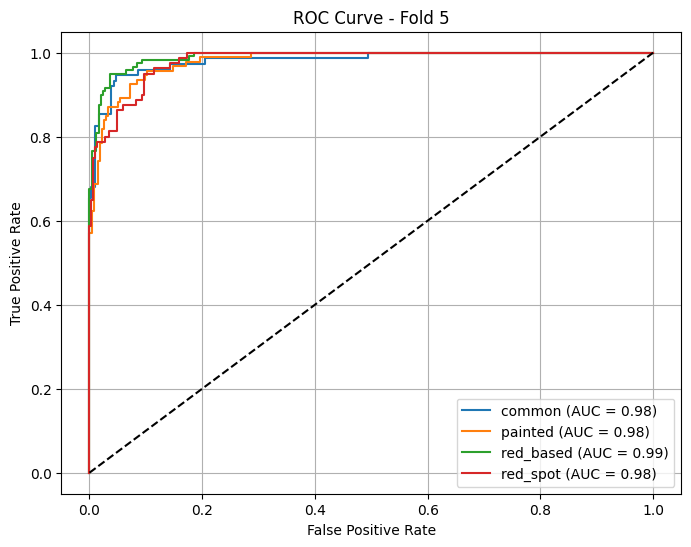

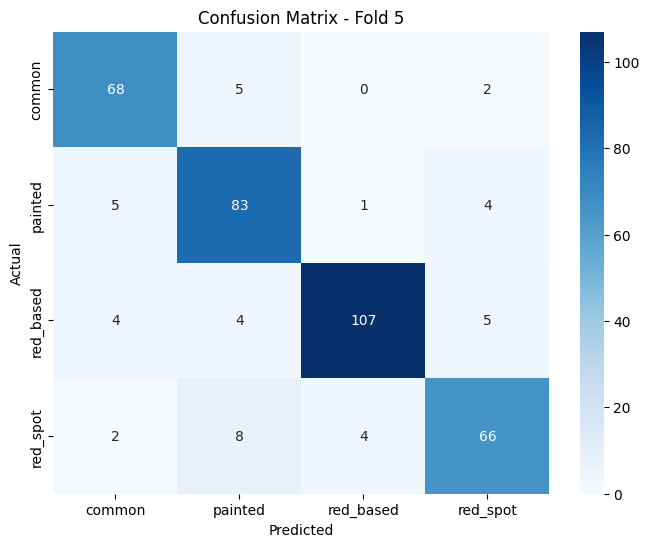

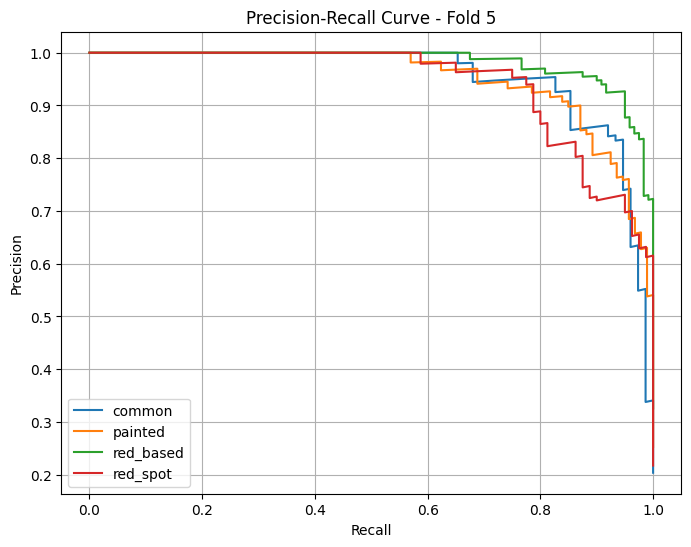

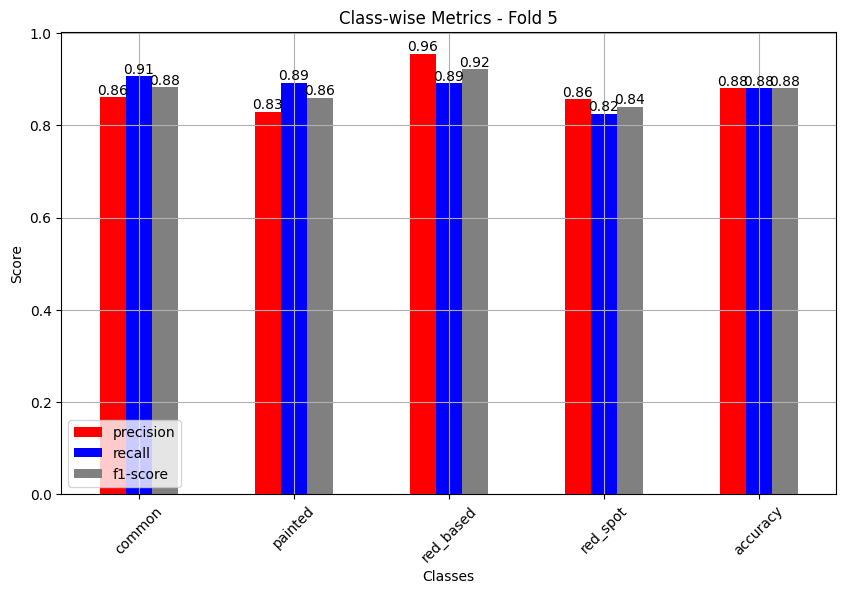

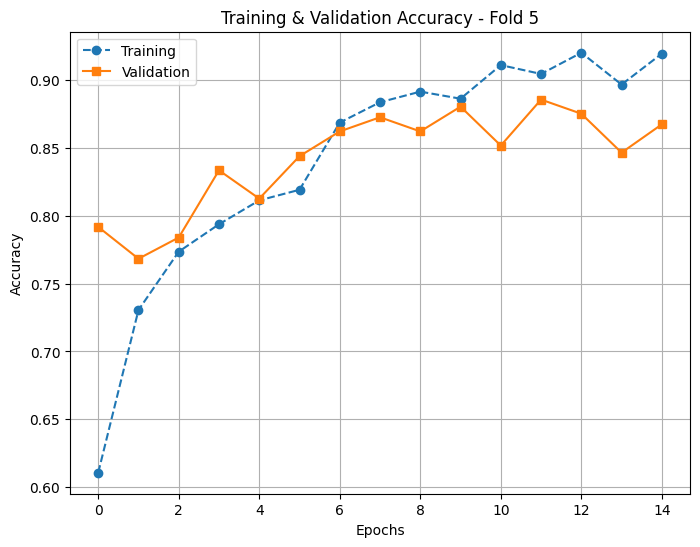

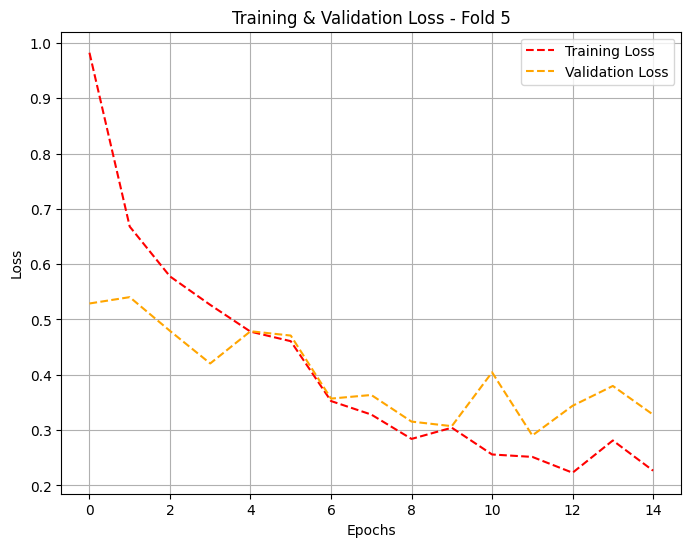

Classification Report - Fold 5:
              precision    recall  f1-score   support

      common       0.86      0.91      0.88        75
     painted       0.83      0.89      0.86        93
   red_based       0.96      0.89      0.92       120
    red_spot       0.86      0.82      0.84        80

    accuracy                           0.88       368
   macro avg       0.88      0.88      0.88       368
weighted avg       0.88      0.88      0.88       368


Combined Results for All Folds:


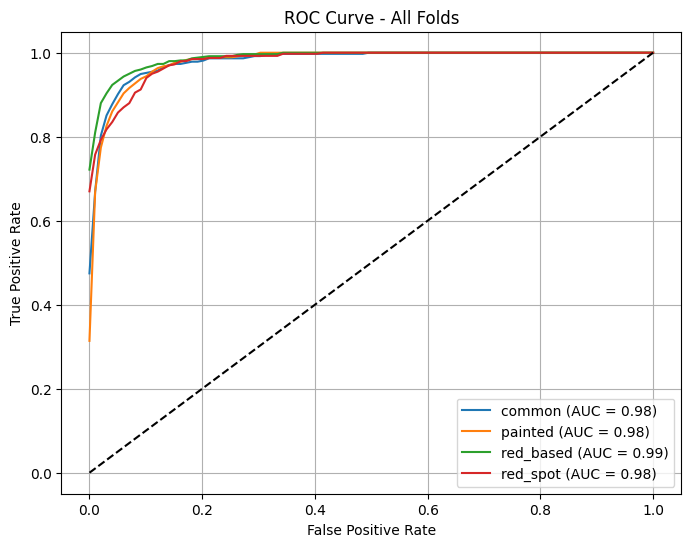

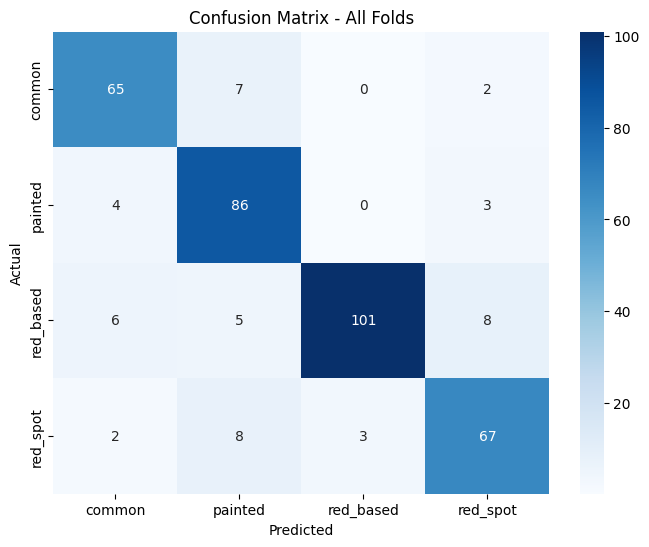

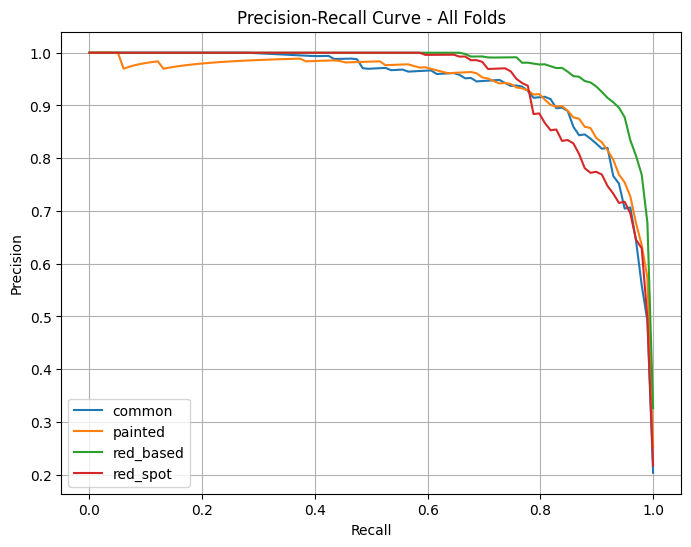

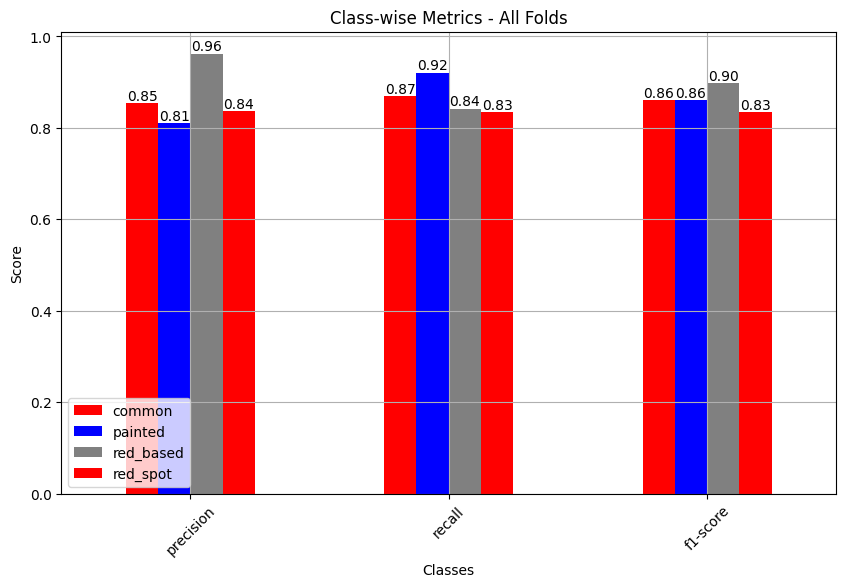

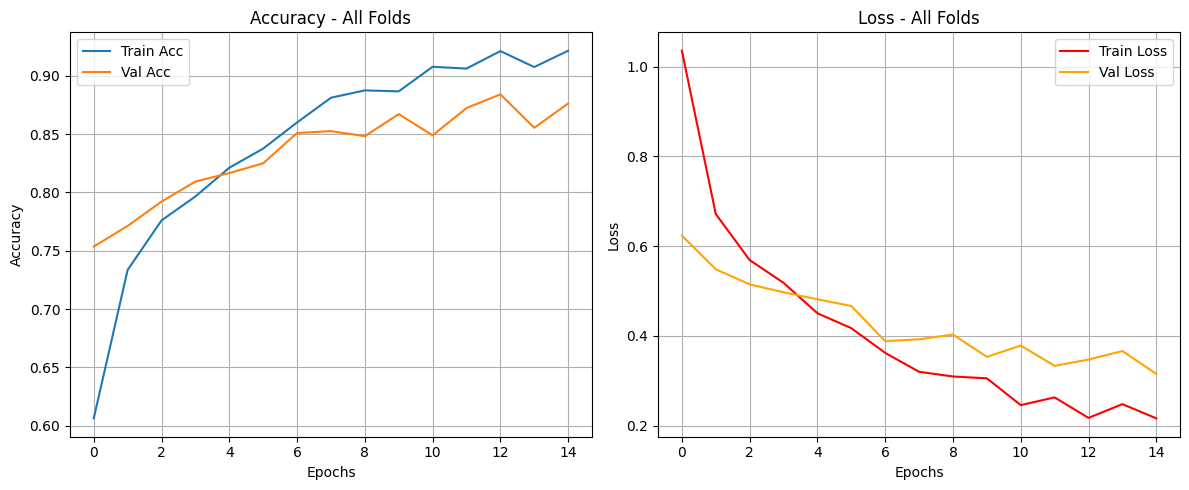


Final Combined Report (ResNet50):
              precision    recall  f1-score   support

      common       0.89      0.89      0.89        75
     painted       0.82      0.92      0.87        93
   red_based       0.97      0.88      0.92       120
    red_spot       0.81      0.81      0.81        80

    accuracy                           0.88       368
   macro avg       0.87      0.88      0.87       368
weighted avg       0.88      0.88      0.88       368

Final Accuracy: 0.8777, F1-Score: 0.8786


In [10]:
# Install required packages
# !pip install imbalanced-learn

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
from collections import Counter

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(f"{len(gpus)} GPUs detected.")
else:
    print("No GPU detected. Running on CPU.")

# Parameters
input_shape = (224, 224, 3)
num_classes = 4
batch_size = 8
epochs = 15  # Set low for demo; increase for real training
k_folds = 5
class_labels = ['common', 'painted', 'red_based', 'red_spot']

# # Assuming X and Y are loaded from preprocessing
# data_file = '/content/preprocessed_data/X_data.npy'
# labels_file = '/content/preprocessed_data/Y_labels.npy'

# if not (os.path.exists(data_file) and os.path.exists(labels_file)):
#     raise FileNotFoundError("Preprocessed data files not found. Please preprocess the data first.")

# X = np.load(data_file, mmap_mode='r')  # Memory-mapped for efficiency
# Y = np.load(labels_file, mmap_mode='r')
# print(f"Loaded X shape: {X.shape}, Y shape: {Y.shape}")

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Normalize data (commented out as requested)
# X_train_scaled = X_train.astype('float32') / 255.0
# X_test_scaled = X_test.astype('float32') / 255.0
X_train_scaled = X_train  # Use raw data as-is
X_test_scaled = X_test    # Use raw data as-is

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled.reshape(X_train_scaled.shape[0], -1), Y_train)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

def batch_generator(X, Y, batch_size=8):
    size = X.shape[0]
    while True:
        indices = np.random.permutation(size)
        for start in range(0, size, batch_size):
            batch_idx = indices[start:min(start + batch_size, size)]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]
            augmented_images = next(datagen.flow(X_batch, shuffle=False, batch_size=batch_size))
            yield augmented_images, Y_batch  # Sparse labels for sparse_categorical_crossentropy

# Define ResNet50 Model
def create_resnet_model(input_shape=(224, 224, 3), num_classes=4):
    base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base.layers[:-5]:
        layer.trainable = False
    for layer in base.layers[-5:]:
        layer.trainable = True

    x = GlobalAveragePooling2D()(base.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Training
def train_with_kfold(X_train, Y_train, X_test, Y_test, k=5, batch_size=8, epochs=15):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    histories = []
    trained_models = []

    with tf.device('/GPU:0' if gpus else '/CPU:0'):
        for fold_no, (train_idx, val_idx) in enumerate(skf.split(X_train, Y_train), 1):
            print(f"Training Fold {fold_no}/{k}")
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

            resnet_model = create_resnet_model(input_shape, num_classes)

            train_gen = batch_generator(X_train_fold, Y_train_fold, batch_size)
            val_gen = batch_generator(X_val_fold, Y_val_fold, batch_size)

            callbacks = [
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),
                ModelCheckpoint(f'best_resnet_model_{fold_no}.weights.h5', save_best_only=True,
                                monitor='val_accuracy', mode='max', save_weights_only=True),
                EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
            ]

            history = resnet_model.fit(
                train_gen,
                validation_data=val_gen,
                epochs=epochs,
                steps_per_epoch=len(X_train_fold) // batch_size,
                validation_steps=len(X_val_fold) // batch_size,
                callbacks=callbacks,
                verbose=1
            )

            histories.append(history)
            trained_models.append(resnet_model)

            tf.keras.backend.clear_session()
            gc.collect()

    return histories, trained_models

# Evaluation and Plotting
def evaluate_and_plot(histories, X_test, Y_test, trained_models):
    resnet_probs_list, resnet_preds_list = [], []

    with tf.device('/GPU:0' if gpus else '/CPU:0'):
        # Fold-wise Visualization
        print("\nFold-by-Fold Visualizations:")
        for fold_no, (model, history) in enumerate(zip(trained_models, histories), 1):
            print(f"\nEvaluating Fold {fold_no}:")
            probs = model.predict(X_test, batch_size=8)
            preds = np.argmax(probs, axis=1)
            resnet_probs_list.append(probs)
            resnet_preds_list.append(preds)

            # Fold-wise Plots
            def plot_roc_fold(Y_test, probs, fold_no):
                plt.figure(figsize=(8, 6))
                for i, cls in enumerate(class_labels):
                    fpr, tpr, _ = roc_curve((Y_test == i).astype(int), probs[:, i])
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f'{cls} (AUC = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], 'k--')
                plt.title(f'ROC Curve - Fold {fold_no}')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_confusion_fold(Y_test, preds, fold_no):
                cm = confusion_matrix(Y_test, preds)
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
                plt.title(f'Confusion Matrix - Fold {fold_no}')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.show()

            def plot_pr_fold(Y_test, probs, fold_no):
                plt.figure(figsize=(8, 6))
                for i, cls in enumerate(class_labels):
                    precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), probs[:, i])
                    plt.plot(recall, precision, label=cls)
                plt.title(f'Precision-Recall Curve - Fold {fold_no}')
                plt.xlabel('Recall')
                plt.ylabel('Precision')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_metrics_fold(Y_test, preds, fold_no):
                report = classification_report(Y_test, preds, target_names=class_labels, output_dict=True)
                df = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])[['precision', 'recall', 'f1-score']]
                df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(10, 6))
                for p in plt.gca().patches:
                    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
                plt.title(f'Class-wise Metrics - Fold {fold_no}')
                plt.xlabel('Classes')
                plt.ylabel('Score')
                plt.xticks(rotation=45)
                plt.legend()
                plt.grid()
                plt.show()

            def plot_acc_fold(history, fold_no):
                plt.figure(figsize=(8, 6))
                plt.plot(history.history['accuracy'], label='Training', linestyle='dashed', marker='o')
                plt.plot(history.history['val_accuracy'], label='Validation', marker='s')
                plt.title(f'Training & Validation Accuracy - Fold {fold_no}')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_loss_fold(history, fold_no):
                plt.figure(figsize=(8, 6))
                plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
                plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
                plt.title(f'Training & Validation Loss - Fold {fold_no}')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.grid()
                plt.show()

            def print_report_fold(Y_test, preds, fold_no):
                report = classification_report(Y_test, preds, target_names=class_labels)
                print(f"Classification Report - Fold {fold_no}:\n{report}")

            # Execute Fold-wise Plots
            plot_roc_fold(Y_test, probs, fold_no)
            plot_confusion_fold(Y_test, preds, fold_no)
            plot_pr_fold(Y_test, probs, fold_no)
            plot_metrics_fold(Y_test, preds, fold_no)
            plot_acc_fold(history, fold_no)
            plot_loss_fold(history, fold_no)
            print_report_fold(Y_test, preds, fold_no)

            tf.keras.backend.clear_session()
            gc.collect()

        # Combined Visualizations
        print("\nCombined Results for All Folds:")
        def plot_roc_combined(Y_test, probs_list):
            plt.figure(figsize=(8, 6))
            mean_fpr = np.linspace(0, 1, 100)
            for i, cls in enumerate(class_labels):
                tprs, aucs = [], []
                for probs in probs_list:
                    fpr, tpr, _ = roc_curve((Y_test == i).astype(int), probs[:, i])
                    tprs.append(np.interp(mean_fpr, fpr, tpr))
                    aucs.append(auc(fpr, tpr))
                mean_tpr = np.mean(tprs, axis=0)
                mean_auc = auc(mean_fpr, mean_tpr)
                plt.plot(mean_fpr, mean_tpr, label=f'{cls} (AUC = {mean_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title('ROC Curve - All Folds')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_confusion_combined(Y_test, preds_list):
            mean_cm = np.mean([confusion_matrix(Y_test, preds) for preds in preds_list], axis=0)
            plt.figure(figsize=(8, 6))
            sns.heatmap(mean_cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
            plt.title('Confusion Matrix - All Folds')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

        def plot_pr_combined(Y_test, probs_list):
            plt.figure(figsize=(8, 6))
            mean_recall = np.linspace(0, 1, 100)
            for i, cls in enumerate(class_labels):
                precisions = []
                for probs in probs_list:
                    precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), probs[:, i])
                    precisions.append(np.interp(mean_recall[::-1], recall[::-1], precision[::-1])[::-1])
                mean_precision = np.mean(precisions, axis=0)
                plt.plot(mean_recall, mean_precision, label=cls)
            plt.title('Precision-Recall Curve - All Folds')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_metrics_combined(Y_test, preds_list):
            reports = [classification_report(Y_test, preds, target_names=class_labels, output_dict=True) for preds in preds_list]
            mean_report = {metric: {cls: np.mean([r[cls][metric] for r in reports]) for cls in class_labels}
                           for metric in ['precision', 'recall', 'f1-score']}
            df = pd.DataFrame(mean_report).T
            df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(10, 6))
            for p in plt.gca().patches:
                plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
            plt.title('Class-wise Metrics - All Folds')
            plt.xlabel('Classes')
            plt.ylabel('Score')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid()
            plt.show()

        def plot_acc_loss_combined(histories):
            plt.figure(figsize=(12, 5))
            # Find the maximum number of epochs across all folds
            max_epochs = max(len(h.history['accuracy']) for h in histories)
            # Pad histories to the same length
            padded_acc = [np.pad(h.history['accuracy'], (0, max_epochs - len(h.history['accuracy'])), mode='constant', constant_values=np.nan) for h in histories]
            padded_val_acc = [np.pad(h.history['val_accuracy'], (0, max_epochs - len(h.history['val_accuracy'])), mode='constant', constant_values=np.nan) for h in histories]
            padded_loss = [np.pad(h.history['loss'], (0, max_epochs - len(h.history['loss'])), mode='constant', constant_values=np.nan) for h in histories]
            padded_val_loss = [np.pad(h.history['val_loss'], (0, max_epochs - len(h.history['val_loss'])), mode='constant', constant_values=np.nan) for h in histories]
            # Compute means, ignoring NaN values
            mean_acc = np.nanmean(padded_acc, axis=0)
            mean_val_acc = np.nanmean(padded_val_acc, axis=0)
            mean_loss = np.nanmean(padded_loss, axis=0)
            mean_val_loss = np.nanmean(padded_val_loss, axis=0)
            plt.subplot(1, 2, 1)
            plt.plot(mean_acc, label='Train Acc')
            plt.plot(mean_val_acc, label='Val Acc')
            plt.title('Accuracy - All Folds')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid()
            plt.subplot(1, 2, 2)
            plt.plot(mean_loss, label='Train Loss', color='red')
            plt.plot(mean_val_loss, label='Val Loss', color='orange')
            plt.title('Loss - All Folds')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.show()

        def print_final_report(Y_test, probs_list):
            mean_probs = np.mean(probs_list, axis=0)
            final_preds = np.argmax(mean_probs, axis=1)
            report = classification_report(Y_test, final_preds, target_names=class_labels)
            acc = accuracy_score(Y_test, final_preds)
            f1 = f1_score(Y_test, final_preds, average='weighted')
            print(f"\nFinal Combined Report (ResNet50):\n{report}")
            print(f"Final Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")

        # Execute Combined Plots
        plot_roc_combined(Y_test, resnet_probs_list)
        plot_confusion_combined(Y_test, resnet_preds_list)
        plot_pr_combined(Y_test, resnet_probs_list)
        plot_metrics_combined(Y_test, resnet_preds_list)
        plot_acc_loss_combined(histories)
        print_final_report(Y_test, resnet_probs_list)

# Train and Evaluate
histories, trained_models = train_with_kfold(X_train_resampled, Y_train_resampled, X_test_scaled, Y_test)
print("Training Complete with ResNet50.")
evaluate_and_plot(histories, X_test_scaled, Y_test, trained_models)

#Ensemble

#Resnet_EfficientNet Confidence Base Ensemble

In [ ]:
# Install required packages
!pip install imbalanced-learn

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
from collections import Counter

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(f"{len(gpus)} GPUs detected.")
else:
    print("No GPU detected. Running on CPU.")

# Parameters
input_shape = (224, 224, 3)
num_classes = 4
batch_size = 8
epochs = 2  # Set low for demo; increase for real training
k_folds = 5
class_labels = ['common', 'painted', 'red_based', 'red_spot']

# Assuming X and Y are loaded from preprocessing
data_file = '/content/preprocessed_data/X_data.npy'
labels_file = '/content/preprocessed_data/Y_labels.npy'

if not (os.path.exists(data_file) and os.path.exists(labels_file)):
    raise FileNotFoundError("Preprocessed data files not found. Please preprocess the data first.")

X = np.load(data_file, mmap_mode='r')  # Memory-mapped for efficiency
Y = np.load(labels_file, mmap_mode='r')
print(f"Loaded X shape: {X.shape}, Y shape: {Y.shape}")

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Normalize data (assuming raw uint8 data)
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled.reshape(X_train_scaled.shape[0], -1), Y_train)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

def batch_generator(X, Y, batch_size=8):
    size = X.shape[0]
    while True:
        indices = np.random.permutation(size)
        for start in range(0, size, batch_size):
            batch_idx = indices[start:min(start + batch_size, size)]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]
            augmented_images = next(datagen.flow(X_batch, shuffle=False, batch_size=batch_size))
            yield augmented_images, Y_batch  # Sparse labels for sparse_categorical_crossentropy

# Define ResNet50 Model
def create_resnet_model(input_shape=(224, 224, 3), num_classes=4):
    base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base.layers[:-5]:
        layer.trainable = False
    for layer in base.layers[-5:]:
        layer.trainable = True

    x = GlobalAveragePooling2D()(base.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Training
def train_with_kfold(X_train, Y_train, X_test, Y_test, k=5, batch_size=8, epochs=2):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    histories = []
    trained_models = []

    with tf.device('/GPU:0' if gpus else '/CPU:0'):
        for fold_no, (train_idx, val_idx) in enumerate(skf.split(X_train, Y_train), 1):
            print(f"Training Fold {fold_no}/{k}")
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

            resnet_model = create_resnet_model(input_shape, num_classes)

            train_gen = batch_generator(X_train_fold, Y_train_fold, batch_size)
            val_gen = batch_generator(X_val_fold, Y_val_fold, batch_size)

            callbacks = [
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),
                ModelCheckpoint(f'best_resnet_model_{fold_no}.weights.h5', save_best_only=True,
                                monitor='val_accuracy', mode='max', save_weights_only=True),
                EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
            ]

            history = resnet_model.fit(
                train_gen,
                validation_data=val_gen,
                epochs=epochs,
                steps_per_epoch=len(X_train_fold) // batch_size,
                validation_steps=len(X_val_fold) // batch_size,
                callbacks=callbacks,
                verbose=1
            )

            histories.append(history)
            trained_models.append(resnet_model)

            tf.keras.backend.clear_session()
            gc.collect()

    return histories, trained_models

# Evaluation and Plotting
def evaluate_and_plot(histories, X_test, Y_test, trained_models):
    resnet_probs_list, resnet_preds_list = [], []

    with tf.device('/GPU:0' if gpus else '/CPU:0'):
        # Fold-wise Visualization
        print("\nFold-by-Fold Visualizations:")
        for fold_no, (model, history) in enumerate(zip(trained_models, histories), 1):
            print(f"\nEvaluating Fold {fold_no}:")
            probs = model.predict(X_test, batch_size=8)
            preds = np.argmax(probs, axis=1)
            resnet_probs_list.append(probs)
            resnet_preds_list.append(preds)

            # Fold-wise Plots
            def plot_roc_fold(Y_test, probs, fold_no):
                plt.figure(figsize=(8, 6))
                for i, cls in enumerate(class_labels):
                    fpr, tpr, _ = roc_curve((Y_test == i).astype(int), probs[:, i])
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f'{cls} (AUC = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], 'k--')
                plt.title(f'ROC Curve - Fold {fold_no}')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_confusion_fold(Y_test, preds, fold_no):
                cm = confusion_matrix(Y_test, preds)
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
                plt.title(f'Confusion Matrix - Fold {fold_no}')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.show()

            def plot_pr_fold(Y_test, probs, fold_no):
                plt.figure(figsize=(8, 6))
                for i, cls in enumerate(class_labels):
                    precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), probs[:, i])
                    plt.plot(recall, precision, label=cls)
                plt.title(f'Precision-Recall Curve - Fold {fold_no}')
                plt.xlabel('Recall')
                plt.ylabel('Precision')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_metrics_fold(Y_test, preds, fold_no):
                report = classification_report(Y_test, preds, target_names=class_labels, output_dict=True)
                df = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])[['precision', 'recall', 'f1-score']]
                df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(10, 6))
                for p in plt.gca().patches:
                    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
                plt.title(f'Class-wise Metrics - Fold {fold_no}')
                plt.xlabel('Classes')
                plt.ylabel('Score')
                plt.xticks(rotation=45)
                plt.legend()
                plt.grid()
                plt.show()

            def plot_acc_fold(history, fold_no):
                plt.figure(figsize=(8, 6))
                plt.plot(history.history['accuracy'], label='Training', linestyle='dashed', marker='o')
                plt.plot(history.history['val_accuracy'], label='Validation', marker='s')
                plt.title(f'Training & Validation Accuracy - Fold {fold_no}')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_loss_fold(history, fold_no):
                plt.figure(figsize=(8, 6))
                plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
                plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
                plt.title(f'Training & Validation Loss - Fold {fold_no}')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.grid()
                plt.show()

            def print_report_fold(Y_test, preds, fold_no):
                report = classification_report(Y_test, preds, target_names=class_labels)
                print(f"Classification Report - Fold {fold_no}:\n{report}")

            # Execute Fold-wise Plots
            plot_roc_fold(Y_test, probs, fold_no)
            plot_confusion_fold(Y_test, preds, fold_no)
            plot_pr_fold(Y_test, probs, fold_no)
            plot_metrics_fold(Y_test, preds, fold_no)
            plot_acc_fold(history, fold_no)
            plot_loss_fold(history, fold_no)
            print_report_fold(Y_test, preds, fold_no)

            tf.keras.backend.clear_session()
            gc.collect()

        # Combined Visualizations
        print("\nCombined Results for All Folds:")
        def plot_roc_combined(Y_test, probs_list):
            plt.figure(figsize=(8, 6))
            mean_fpr = np.linspace(0, 1, 100)
            for i, cls in enumerate(class_labels):
                tprs, aucs = [], []
                for probs in probs_list:
                    fpr, tpr, _ = roc_curve((Y_test == i).astype(int), probs[:, i])
                    tprs.append(np.interp(mean_fpr, fpr, tpr))
                    aucs.append(auc(fpr, tpr))
                mean_tpr = np.mean(tprs, axis=0)
                mean_auc = auc(mean_fpr, mean_tpr)
                plt.plot(mean_fpr, mean_tpr, label=f'{cls} (AUC = {mean_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title('ROC Curve - All Folds')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_confusion_combined(Y_test, preds_list):
            mean_cm = np.mean([confusion_matrix(Y_test, preds) for preds in preds_list], axis=0)
            plt.figure(figsize=(8, 6))
            sns.heatmap(mean_cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
            plt.title('Confusion Matrix - All Folds')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

        def plot_pr_combined(Y_test, probs_list):
            plt.figure(figsize=(8, 6))
            mean_recall = np.linspace(0, 1, 100)
            for i, cls in enumerate(class_labels):
                precisions = []
                for probs in probs_list:
                    precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), probs[:, i])
                    precisions.append(np.interp(mean_recall[::-1], recall[::-1], precision[::-1])[::-1])
                mean_precision = np.mean(precisions, axis=0)
                plt.plot(mean_recall, mean_precision, label=cls)
            plt.title('Precision-Recall Curve - All Folds')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_metrics_combined(Y_test, preds_list):
            reports = [classification_report(Y_test, preds, target_names=class_labels, output_dict=True) for preds in preds_list]
            mean_report = {metric: {cls: np.mean([r[cls][metric] for r in reports]) for cls in class_labels}
                           for metric in ['precision', 'recall', 'f1-score']}
            df = pd.DataFrame(mean_report).T
            df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(10, 6))
            for p in plt.gca().patches:
                plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
            plt.title('Class-wise Metrics - All Folds')
            plt.xlabel('Classes')
            plt.ylabel('Score')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid()
            plt.show()

        def plot_acc_loss_combined(histories):
            plt.figure(figsize=(12, 5))
            mean_acc = np.mean([h.history['accuracy'] for h in histories], axis=0)
            mean_val_acc = np.mean([h.history['val_accuracy'] for h in histories], axis=0)
            mean_loss = np.mean([h.history['loss'] for h in histories], axis=0)
            mean_val_loss = np.mean([h.history['val_loss'] for h in histories], axis=0)
            plt.subplot(1, 2, 1)
            plt.plot(mean_acc, label='Train Acc')
            plt.plot(mean_val_acc, label='Val Acc')
            plt.title('Accuracy - All Folds')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid()
            plt.subplot(1, 2, 2)
            plt.plot(mean_loss, label='Train Loss', color='red')
            plt.plot(mean_val_loss, label='Val Loss', color='orange')
            plt.title('Loss - All Folds')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.show()

        def print_final_report(Y_test, probs_list):
            mean_probs = np.mean(probs_list, axis=0)
            final_preds = np.argmax(mean_probs, axis=1)
            report = classification_report(Y_test, final_preds, target_names=class_labels)
            acc = accuracy_score(Y_test, final_preds)
            f1 = f1_score(Y_test, final_preds, average='weighted')
            print(f"\nFinal Combined Report (ResNet50):\n{report}")
            print(f"Final Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")

        # Execute Combined Plots
        plot_roc_combined(Y_test, resnet_probs_list)
        plot_confusion_combined(Y_test, resnet_preds_list)
        plot_pr_combined(Y_test, resnet_probs_list)
        plot_metrics_combined(Y_test, resnet_preds_list)
        plot_acc_loss_combined(histories)
        print_final_report(Y_test, resnet_probs_list)

# Train and Evaluate
histories, trained_models = train_with_kfold(X_train_resampled, Y_train_resampled, X_test_scaled, Y_test)
print("Training Complete with ResNet50.")
evaluate_and_plot(histories, X_test_scaled, Y_test, trained_models)

#Snapshot Ensemble

In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
from collections import Counter

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(f"{len(gpus)} GPUs detected.")
else:
    print("No GPU detected. Running on CPU.")

# Parameters
input_shape = (224, 224, 3)
num_classes = 4
batch_size = 8
epochs = 10  # Increased for better training
cycles = 2
class_labels = ['common', 'painted', 'red_based', 'red_spot']

# Load preprocessed data (assuming saved as .npy files)
data_file = '/content/preprocessed_data/X_data.npy'
labels_file = '/content/preprocessed_data/Y_labels.npy'

if not (os.path.exists(data_file) and os.path.exists(labels_file)):
    raise FileNotFoundError("Preprocessed data files not found. Please preprocess the data first.")

X = np.load(data_file, mmap_mode='r')  # Memory-mapped for efficiency
Y = np.load(labels_file, mmap_mode='r')
print(f"Loaded X shape: {X.shape}, Y shape: {Y.shape}")

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train.reshape(X_train.shape[0], -1), Y_train)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Normalize data
X_train_resampled = X_train_resampled / 255.0
X_test = X_test / 255.0

# Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

def batch_generator(X, Y, batch_size=8):
    size = X.shape[0]
    while True:
        indices = np.random.permutation(size)
        for start in range(0, size, batch_size):
            batch_idx = indices[start:min(start + batch_size, size)]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]
            augmented_images = next(datagen.flow(X_batch, shuffle=False, batch_size=batch_size))
            yield augmented_images, to_categorical(Y_batch, num_classes)

# Base Model Definition (ResNet50)
def create_resnet_model(input_shape=(224, 224, 3)):
    base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base.layers[:-5]:
        layer.trainable = False
    for layer in base.layers[-5:]:
        layer.trainable = True

    x = GlobalAveragePooling2D()(base.output)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=output)
    return model

# Cyclic Learning Rate Callback
class CyclicLR(Callback):
    def __init__(self, base_lr=0.0001, max_lr=0.001, step_size=2000., mode='triangular'):
        super(CyclicLR, self).__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.cycle = 0
        self.history = {}

    def on_train_begin(self, logs=None):
        logs = logs or {}
        self.cycle = 0
        optimizer = self.model.optimizer
        if isinstance(optimizer, tf.keras.mixed_precision.LossScaleOptimizer):
            tf.keras.backend.set_value(optimizer.inner_optimizer.learning_rate, self.base_lr)
        else:
            tf.keras.backend.set_value(optimizer.learning_rate, self.base_lr)

    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        optimizer = self.model.optimizer
        if isinstance(optimizer, tf.keras.mixed_precision.LossScaleOptimizer):
            current_lr = tf.keras.backend.get_value(optimizer.inner_optimizer.learning_rate)
        else:
            current_lr = tf.keras.backend.get_value(optimizer.learning_rate)

        self.history.setdefault('lr', []).append(current_lr)

        cycle = np.floor(1 + batch / (2. * self.step_size))
        x = np.abs(batch / self.step_size - 2. * cycle + 1)
        lr = self.base_lr + (self.max_lr - self.base_lr) * max(0, (1 - x))

        if isinstance(optimizer, tf.keras.mixed_precision.LossScaleOptimizer):
            tf.keras.backend.set_value(optimizer.inner_optimizer.learning_rate, lr)
        else:
            tf.keras.backend.set_value(optimizer.learning_rate, lr)

# Snapshot Callback
class SnapshotCallback(Callback):
    def __init__(self, snapshots, period):
        super(SnapshotCallback, self).__init__()
        self.snapshots = snapshots
        self.period = period
        self.epoch_count = 0

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_count += 1
        if (self.epoch_count % self.period) == 0:
            snapshot_idx = (self.epoch_count // self.period) - 1
            if snapshot_idx < len(self.snapshots):
                self.snapshots[snapshot_idx] = self.model.get_weights()
                print(f"Saved snapshot {snapshot_idx + 1} at epoch {self.epoch_count}")

# Training with Snapshots
def train_with_snapshots(X_train, Y_train, X_test, Y_test, batch_size=8, epochs=10, cycles=2):
    histories = []
    resnet_snapshots = [None] * cycles

    with tf.device('/GPU:2' if gpus else '/CPU:0'):
        # Train ResNet50
        resnet_model = create_resnet_model()
        resnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
        train_gen = batch_generator(X_train, Y_train, batch_size)
        steps_per_epoch = len(X_train) // batch_size
        period = epochs // cycles

        resnet_callbacks = [
            CyclicLR(base_lr=0.0001, max_lr=0.001, step_size=steps_per_epoch * period),
            SnapshotCallback(resnet_snapshots, period),
            EarlyStopping(monitor='loss', patience=3)
        ]

        resnet_history = resnet_model.fit(
            train_gen,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            callbacks=resnet_callbacks,
            verbose=1
        )
        histories.append(resnet_history)

    return histories, resnet_model, resnet_snapshots

# Snapshot Ensemble Predictions
def get_snapshot_ensemble_predictions(model, snapshots, X_test, batch_size=8):
    probs_list = []
    for weights in snapshots:
        if weights is not None:
            model.set_weights(weights)
            probs = model.predict(X_test, batch_size=batch_size, verbose=0)
            probs_list.append(probs)
    if not probs_list:
        raise ValueError("No valid snapshots available for ensemble prediction.")
    ensemble_probs = np.mean(probs_list, axis=0)
    ensemble_preds = np.argmax(ensemble_probs, axis=1)
    return ensemble_probs, ensemble_preds

# Evaluation and Plotting
def evaluate_and_plot(histories, X_test, Y_test, resnet_model, resnet_snapshots):
    with tf.device('/GPU:2' if gpus else '/CPU:0'):
        # Snapshot Predictions
        ensemble_probs, ensemble_preds = get_snapshot_ensemble_predictions(resnet_model, resnet_snapshots, X_test)

        # Visualization Functions
        def plot_roc(Y_test, probs, title):
            plt.figure(figsize=(8, 6))
            for i, cls in enumerate(class_labels):
                fpr, tpr, _ = roc_curve((Y_test == i).astype(int), probs[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{cls} (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(title)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_confusion(Y_test, preds, title):
            cm = confusion_matrix(Y_test, preds)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
            plt.title(title)
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

        def plot_pr(Y_test, probs, title):
            plt.figure(figsize=(8, 6))
            for i, cls in enumerate(class_labels):
                precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), probs[:, i])
                plt.plot(recall, precision, label=cls)
            plt.title(title)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_metrics(Y_test, preds, title):
            report = classification_report(Y_test, preds, target_names=class_labels, output_dict=True)
            df = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])[['precision', 'recall', 'f1-score']]
            df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(10, 6))
            for p in plt.gca().patches:
                plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
            plt.title(title)
            plt.xlabel('Classes')
            plt.ylabel('Score')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid()
            plt.show()

        def plot_acc_loss(histories):
            plt.figure(figsize=(12, 5))
            for h in histories:
                plt.subplot(1, 2, 1)
                plt.plot(h.history['accuracy'], label='Train Acc')
                plt.title('Training Accuracy')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.grid()
                plt.subplot(1, 2, 2)
                plt.plot(h.history['loss'], label='Train Loss', color='red')
                plt.title('Training Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.grid()
            plt.tight_layout()
            plt.show()

        def print_report(Y_test, preds, title):
            report = classification_report(Y_test, preds, target_names=class_labels)
            acc = accuracy_score(Y_test, preds)
            f1 = f1_score(Y_test, preds, average='weighted')
            print(f"\n{title}:\n{report}")
            print(f"Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")

        # Execute Visualizations
        print("\nSnapshot Ensemble Results:")
        plot_roc(Y_test, ensemble_probs, "ROC Curve - Snapshot Ensemble")
        plot_confusion(Y_test, ensemble_preds, "Confusion Matrix - Snapshot Ensemble")
        plot_pr(Y_test, ensemble_probs, "Precision-Recall Curve - Snapshot Ensemble")
        plot_metrics(Y_test, ensemble_preds, "Class-wise Metrics - Snapshot Ensemble")
        plot_acc_loss(histories)
        print_report(Y_test, ensemble_preds, "Final Snapshot Ensemble Report")

        tf.keras.backend.clear_session()
        gc.collect()

# Train and Evaluate
histories, resnet_model, resnet_snapshots = train_with_snapshots(
    X_train_resampled, Y_train_resampled, X_test, Y_test, batch_size=batch_size, epochs=epochs, cycles=cycles
)
print("Training Complete with Snapshot Ensembling.")
evaluate_and_plot(histories, X_test, Y_test, resnet_model, resnet_snapshots)

#End